## Problem Statement
## Perform sentimental analysis:
## 1) Extract reviews of any product from ecommerce website like amazon
## 2) Perform emotion mining

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import spacy
import codecs
import requests
from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import warnings 
warnings.filterwarnings('ignore')

In [2]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

## Looping to multiple pages


In [3]:
def get_soup(url):
    r = requests.get(url,headers=headers,params = {'url':url, 'wait':2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
reviewlist = []
def get_reviews(soup):
    reviews = soup.find_all('div',{'data-hook':'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [5]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/product-reviews/B0B574QXFL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

In [6]:
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nNice product,5.0,Looks so good... Easy to use. Charging fast. C...,Reviewed in India on 6 March 2024
1,4.0 out of 5 stars\nGood smart watch,4.0,This smart watch is good value for money 💰. An...,Reviewed in India on 9 February 2024
2,5.0 out of 5 stars\nSmart watch,5.0,This smart watch is very nice and good quality...,Reviewed in India on 11 March 2024
3,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,Reviewed in India on 12 August 2021
4,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,Reviewed in India on 9 August 2022
...,...,...,...,...
105,4.0 out of 5 stars\nNice watch,4.0,It is very nice watch working properly price r...,Reviewed in India on 18 November 2023
106,4.0 out of 5 stars\nAwesome product,4.0,"Good product, value for money..",Reviewed in India on 22 November 2023
107,5.0 out of 5 stars\nRich look,5.0,Lowest price and good quality,Reviewed in India on 24 February 2024
108,4.0 out of 5 stars\nGood quality watch in budg...,4.0,Its a good quality watch if you are on a budge...,Reviewed in India on 29 October 2023


In [7]:
df["Review_Date"] = df["Review_Date"].replace("Reviewed in India on",'',regex=True)
df.head(20)

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nNice product,5.0,Looks so good... Easy to use. Charging fast. C...,6 March 2024
1,4.0 out of 5 stars\nGood smart watch,4.0,This smart watch is good value for money 💰. An...,9 February 2024
2,5.0 out of 5 stars\nSmart watch,5.0,This smart watch is very nice and good quality...,11 March 2024
3,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
4,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
5,4.0 out of 5 stars\nGood watch for all but req...,4.0,My experience with the boAt Xtend Call Plus Sm...,30 May 2023
6,5.0 out of 5 stars\nDose not work,5.0,Products dose not work,27 February 2024
7,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
8,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
9,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,16 December 2021


In [8]:
df.to_csv("test_mining.csv")

## loading dataset

In [9]:
reviews = pd.read_csv("test_mining.csv")
reviews

,Unnamed: 0,Title,Rating,Review,Review_Date
0,0,5.0 out of 5 stars\nNice product,5.0,Looks so good... Easy to use. Charging fast. C...,6 March 2024
1,1,4.0 out of 5 stars\nGood smart watch,4.0,This smart watch is good value for money 💰. An...,9 February 2024
2,2,5.0 out of 5 stars\nSmart watch,5.0,This smart watch is very nice and good quality...,11 March 2024
3,3,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
4,4,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
...,...,...,...,...,...
105,105,4.0 out of 5 stars\nNice watch,4.0,It is very nice watch working properly price r...,18 November 2023
106,106,4.0 out of 5 stars\nAwesome product,4.0,"Good product, value for money..",22 November 2023
107,107,5.0 out of 5 stars\nRich look,5.0,Lowest price and good quality,24 February 2024
108,108,4.0 out of 5 stars\nGood quality watch in budg...,4.0,Its a good quality watch if you are on a budge...,29 October 2023


In [10]:
reviews

,Unnamed: 0,Title,Rating,Review,Review_Date
0,0,5.0 out of 5 stars\nNice product,5.0,Looks so good... Easy to use. Charging fast. C...,6 March 2024
1,1,4.0 out of 5 stars\nGood smart watch,4.0,This smart watch is good value for money 💰. An...,9 February 2024
2,2,5.0 out of 5 stars\nSmart watch,5.0,This smart watch is very nice and good quality...,11 March 2024
3,3,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
4,4,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
...,...,...,...,...,...
105,105,4.0 out of 5 stars\nNice watch,4.0,It is very nice watch working properly price r...,18 November 2023
106,106,4.0 out of 5 stars\nAwesome product,4.0,"Good product, value for money..",22 November 2023
107,107,5.0 out of 5 stars\nRich look,5.0,Lowest price and good quality,24 February 2024
108,108,4.0 out of 5 stars\nGood quality watch in budg...,4.0,Its a good quality watch if you are on a budge...,29 October 2023


In [11]:
reviews.Rating.describe()

count    110.000000
mean       4.190909
std        0.642465
min        3.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64

In [12]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   110 non-null    int64  
 1   Title        110 non-null    object 
 2   Rating       110 non-null    float64
 3   Review       107 non-null    object 
 4   Review_Date  110 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 4.4+ KB


In [13]:
#check for null values
reviews.isnull().sum()

Unnamed: 0     0
Title          0
Rating         0
Review         3
Review_Date    0
dtype: int64

In [14]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Unnamed: 0,Title,Rating,Review,Review_Date
0,0,5.0 out of 5 stars\nNice product,5.0,Looks so good... Easy to use. Charging fast. C...,6 March 2024
1,1,4.0 out of 5 stars\nGood smart watch,4.0,This smart watch is good value for money 💰. An...,9 February 2024
2,2,5.0 out of 5 stars\nSmart watch,5.0,This smart watch is very nice and good quality...,11 March 2024
3,3,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
4,4,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022


## Data visualization

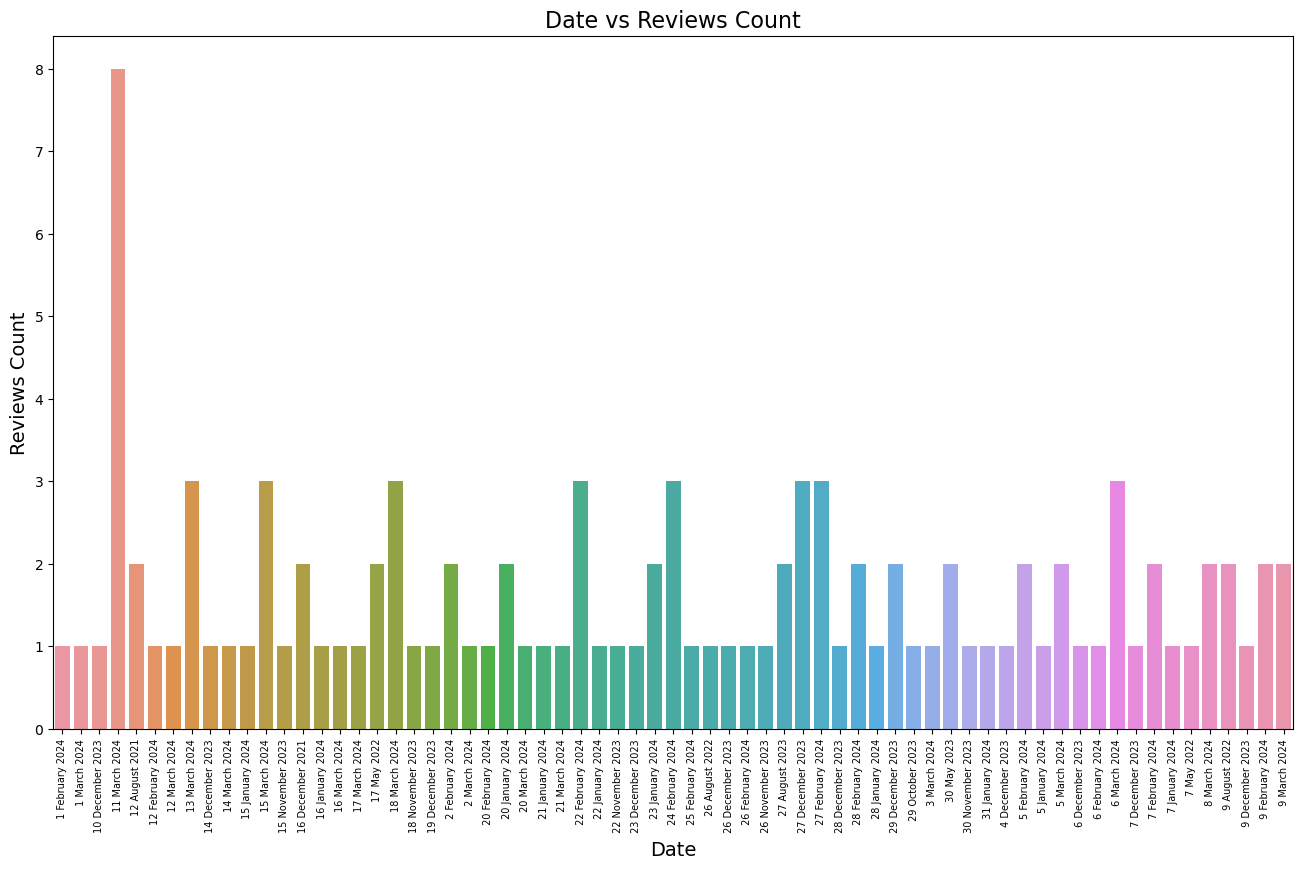

In [15]:
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview["Date"] =dayreview["Review_Date"]
dayreview.sort_values(by = ["Review_Date"])
plt.figure(figsize=(16,9))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

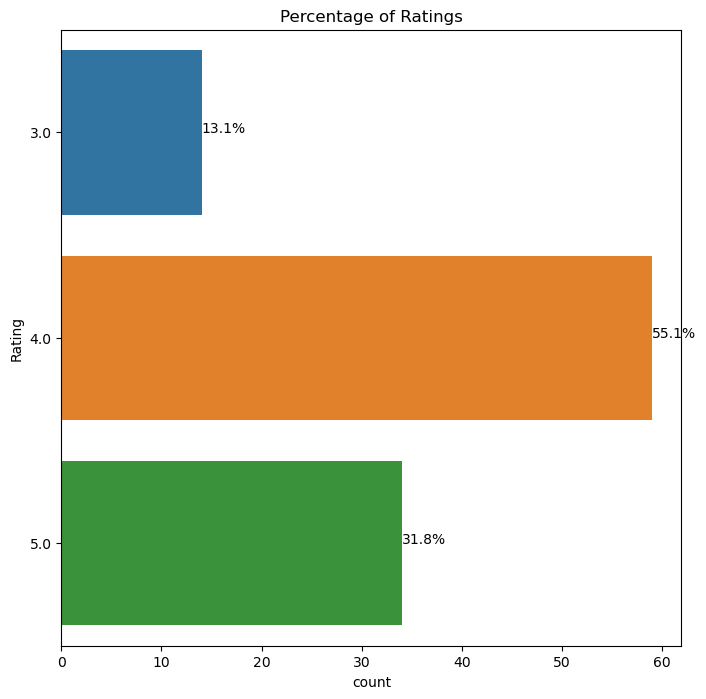

In [16]:
#plotting graph in percentage
plt.figure(figsize=(8,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

## BasicText Preprocessing for Sentiment Analysis
## Spelling Correction

In [17]:
reviews["Review"][:5].apply(lambda x : str(TextBlob(x).correct()))

0    Looks so good... Easy to use. Charging fast. C...
1    His smart watch is good value for money 💰. And...
2    His smart watch is very nice and good quality ...
3    The media could not be loaded.\n              ...
4    Shipping the parts mostly covered in other rev...
Name: Review, dtype: object

In [18]:
b_reviews = reviews[['Review']]
b_reviews

,Review
0,Looks so good... Easy to use. Charging fast. C...
1,This smart watch is good value for money 💰. An...
2,This smart watch is very nice and good quality...
3,The media could not be loaded.\n ...
4,Skipping the parts mostly covered in other rev...
...,...
105,It is very nice watch working properly price r...
106,"Good product, value for money.."
107,Lowest price and good quality
108,Its a good quality watch if you are on a budge...


In [19]:
b_reviews.reset_index(drop=True, inplace=True)

In [20]:
stop_words = stopwords.words('english')
b_reviews['Review'] = b_reviews['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))

## Lemmatizer

In [30]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(b_reviews))):
    cleaned = re.sub('[^a-zA-Z]', " ", b_reviews["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/107 [00:00<?, ?it/s]

In [29]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SUMAN\AppData\Roaming\nltk_data...


True

In [31]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": b_reviews.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...
1,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
2,smart watch nice good quality boat company,this smart watch nice good quality boat company
3,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...


## Text pre-processing 
## removing "@names"

In [32]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex,text)
    for i in r:
        text = re.sub(i,' ',text)
    return text

In [33]:
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...
1,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
2,smart watch nice good quality boat company,this smart watch nice good quality boat company
3,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
5,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
6,product dose work,products dose work
7,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...


In [35]:
#removing unwanted links
cleaned_reviews = []
for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))
dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...
1,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
2,smart watch nice good quality boat company,this smart watch nice good quality boat company
3,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
5,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
6,product dose work,products dose work
7,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...


In [36]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...
1,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
2,smart watch nice good quality boat company,this smart watch nice good quality boat company
3,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
5,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
6,product dose work,products dose work
7,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...


In [37]:
#droping duplicate values
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...
1,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
2,smart watch nice good quality boat company,this smart watch nice good quality boat company
3,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
5,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
6,product dose work,products dose work
7,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...


In [38]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [39]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...
1,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
2,smart watch nice good quality boat company,this smart watch nice good quality boat company
3,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
5,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
6,product dose work,products dose work
7,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...


In [40]:
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [41]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [42]:
my_stop_words = stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...
1,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
2,smart watch nice good quality boat company,this smart watch nice good quality boat company
3,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
5,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
6,product dose work,products dose work
7,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...


In [43]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['smart', 'watch', 'good', 'value', 'money', 'feature', 'packed', 'product', 'ip', 'rated', 'bought', 'month', 'ago', 'still', 'work', 'fine', 'thing', 'found', 'bad', 'vibration', 'sensor', 'satisfying', 'also', 'bit', 'laggy'])

In [44]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [look, good, easy, use, charging, fast, charge...
1    [smart, watch, good, value, money, feature, pa...
2    [smart, watch, nice, good, quality, boat, comp...
3    [medium, could, loaded, used, watch, month, bo...
4    [skipping, part, mostly, covered, review, spon...
5    [experience, boat, xtend, call, plus, smart, w...
6                                [product, dose, work]
7    [smart, model, boat, extend, plus, watch, func...
8    [review, overviewaverage, boat, today, launche...
9    [pro, premium, build, quality, matte, finishin...
Name: Clean_Reviews, dtype: object

In [45]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...,"[look, good, easy, use, charging, fast, charge..."
1,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...,"[smart, watch, good, value, money, feature, pa..."
2,smart watch nice good quality boat company,this smart watch nice good quality boat company,"[smart, watch, nice, good, quality, boat, comp..."
3,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo..."
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon..."
5,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...,"[experience, boat, xtend, call, plus, smart, w..."
6,product dose work,products dose work,"[product, dose, work]"
7,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func..."
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche..."
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...,"[pro, premium, build, quality, matte, finishin..."


In [46]:
#converting words to stemmer
stemmer = SnowballStemmer("english")

In [47]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,look good easi use charg fast charg stay long ...
1,smart watch good valu money featur pack produc...
2,smart watch nice good qualiti boat compani
3,medium could load use watch month bought first...
4,skip part most cover review sponsor yt one add...
...,...
102,nice watch work proper price rang nice must bu...
103,good product valu money
104,lowest price good qualiti
105,good qualiti watch budget cannot use track swi...


In [48]:
#converting words to lemma
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

,stemmed
0,look good easy use charging fast charge stay l...
1,smart watch good value money feature packed pr...
2,smart watch nice good quality boat company
3,medium could loaded used watch month bought fi...
4,skipping part mostly covered review sponsored ...
...,...
102,nice watch working properly price range nice m...
103,good product value money
104,lowest price good quality
105,good quality watch budget cannot used tracking...


## Basic Feature Extaction
## Applying bag of Words without N grams

In [49]:
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [54]:
print(cv.get_feature_names_out()[109:200])

['beginning' 'believe' 'beneficial' 'benefitsnow' 'best' 'better' 'beyond'
 'bezel' 'big' 'bike' 'bip' 'birthday' 'bit' 'black' 'bloated' 'blood'
 'blue' 'bluetooth' 'boat' 'body' 'bother' 'bought' 'box' 'boyfriend' 'bp'
 'bpm' 'brand' 'break' 'breath' 'breathing' 'bright' 'brightness' 'brings'
 'browsing' 'brushed' 'bt' 'budget' 'bug' 'build' 'buildi' 'built' 'bulb'
 'burn' 'burnt' 'button' 'buy' 'buyer' 'buying' 'cable' 'cache'
 'calculated' 'calculating' 'calculation' 'calculator' 'calender' 'call'
 'called' 'caller' 'callin' 'calling' 'calorie' 'calory' 'cals' 'came'
 'camera' 'cannot' 'carddesign' 'care' 'cart' 'case' 'category' 'catering'
 'chahiye' 'change' 'changed' 'charge' 'charger' 'charging' 'charm'
 'cheap' 'check' 'checked' 'checking' 'chennai' 'childish' 'chinese'
 'choor' 'choose' 'claim' 'claimed' 'classic']


In [55]:
print(cv.get_feature_names_out()[:100])

['aaj' 'able' 'absolutely' 'ac' 'accept' 'acceptable' 'acceptance'
 'accepts' 'access' 'accessibility' 'accidentally' 'account' 'accuracy'
 'accuracybatteryyou' 'accuracycomparing' 'accurate' 'accurately' 'ach'
 'ackward' 'acticity' 'activate' 'activating' 'active' 'activites'
 'activity' 'actual' 'actually' 'adapter' 'add' 'added' 'addition'
 'adjust' 'advanced' 'advertised' 'aggregate' 'ago' 'alarm' 'alert'
 'alexa' 'allowed' 'allowing' 'almost' 'along' 'also' 'alternative'
 'aluminium' 'always' 'amaze' 'amazfit' 'amazing' 'amazon' 'amoled'
 'amount' 'analog' 'android' 'angle' 'animal' 'animation' 'anniversary'
 'another' 'answer' 'anyone' 'anything' 'anywhere' 'aod' 'apart' 'app'
 'appaccuracyaccuracy' 'appaccuracybatteryfinal' 'appearance' 'appeared'
 'apple' 'apps' 'appyou' 'around' 'arre' 'asakte' 'aside' 'asks' 'aspect'
 'assistant' 'assisted' 'atm' 'attached' 'attaching' 'attention'
 'attractive' 'audio' 'aur' 'auto' 'available' 'average' 'away' 'awesome'
 'back' 'background' '

In [56]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


## CountVectorizer with N-grams (Bigrams & Trigrams)

In [57]:
dataframe = dataframe.reset_index(drop=True)

In [58]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/106 [00:00<?, ?it/s]

In [61]:
corpus[7]

'smart model boat extend plu watch function well worth price r batteri begin last day next charg last day last settl one day extens user app amol display good touch featur good access app easili reachabl simpl brows featur sleep measur good take day time nap night time show exactli went sleep woke spo measur neaarer measur person digit instrument heart rate measur also nearer instrument stress also reflect nearli real condit activ step show correct distanc also good watch take bike ride walk show distanc cover set target sport featur check yet fulli check featur function water resist ye water resist check bath drizzl rain time display good number display avail cloud suffici alway featur work model avail featur pleas could skin made avail display wrist put rest rais respect featur function featur alway enabl otherwis function bluetooth call featur good speaker loud enough take call use listen audio video walk ofcours batteri drain quickli messag ye good see notif flash light function ok

In [62]:
# Applying Countvectorizer
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [64]:
X.shape

(106, 1546)

In [66]:
cv.get_feature_names_out()[:20]

array(['absolut', 'accept', 'access', 'account', 'accur', 'accuraci',
       'accuraci sleep', 'accuraci sleep track', 'activ', 'activ includ',
       'activ step', 'actual', 'ad', 'add', 'ago', 'alarm', 'alarm set',
       'alarm timer', 'alert', 'alexa'], dtype=object)

In [67]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [69]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

,absolut,accept,access,account,accur,accuraci,accuraci sleep,accuraci sleep track,activ,activ includ,...,would recommend go,wrist,xtend,xtend boat,xtend call,xtend call plu,xtend smartwatch,xtend watch,ye,yt one
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,3,1,1,1,3,0,...,0,0,1,0,0,0,0,1,1,0
4,0,1,1,0,0,1,0,0,6,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/106 [00:00<?, ?it/s]

In [71]:
corpus[4]

'skip part mostli cover review sponsor yt one add irrit common sens disappoint notic sinc last day actual usag smart watch aod show date day week show hour min way configur beyond analog digit view also get turn start exercis activ like walk screen go dark go walk calori count home screen anywher els show step count calori aggreg calori burnt exercis activ e step cal cycl show home screen separ two entri app smart enough addit quick way go start activ exercis first press side button twice select activit list menu versu swipe home screen go utterli useless cricket score screen instead mani even use customis menu option function map provid touch wake display avail screen avail rupe yr old huwai band one press side button everi time see home screen utterli inconveni reach day night time auto configur aod twist wake provid make irrit sleep hour kept thu daili two time day task enabl disabl featur manual everi freak day kindli also note indic whatsoev aod start exercis activ start one like 

In [72]:
#Applying TF-IDF Vectorizer
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [73]:
X.shape

(106, 1546)

In [75]:
tfidf_v.get_feature_names_out()[:20]

array(['absolut', 'accept', 'access', 'account', 'accur', 'accuraci',
       'accuraci sleep', 'accuraci sleep track', 'activ', 'activ includ',
       'activ step', 'actual', 'ad', 'add', 'ago', 'alarm', 'alarm set',
       'alarm timer', 'alert', 'alexa'], dtype=object)

In [76]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [77]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

,absolut,accept,access,account,accur,accuraci,accuraci sleep,accuraci sleep track,activ,activ includ,...,would recommend go,wrist,xtend,xtend boat,xtend call,xtend call plu,xtend smartwatch,xtend watch,ye,yt one
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.029399,0.069343,0.023114,0.027868,0.027868,0.063945,0.0,...,0.0,0.000000,0.023837,0.0,0.0,0.0,0.0,0.027868,0.023837,0.000000
4,0.000000,0.026968,0.025149,0.000000,0.000000,0.024387,0.000000,0.000000,0.134931,0.0,...,0.0,0.026002,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.033099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
104,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [78]:
#Named Entity Recognition (NER)
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'look good easy use charging fast charge stay long time smart watch good value money feature packed product ip rated bought month ago still work fine thing found bad vibration sensor satisfying also bit laggy smart watch nice good quality boat company medium could loaded used watch month bought first sale keep reading unbiased review tip trick ensure function watch working smoothly large curved display price category inch battery heavy usage frequently waking screen alexa alarm notification day standby checking time occassionally day pretty good full charging time hour decent quality magnetic charging cable provided use low power adapter power bank laptop necessary health workout tracking option spo oxymeter heart rate monitor accuracy sleep tracking pretty accurate paedometer accurate time sometimes hundred step added randomly without activity happens randomly day stress monitor also sure calculated sensor fake probably watch contact skin display warning message display data lift wake

In [79]:
#Parts Of Speech (POS) Tagging
nlp = spacy.load('en_core_web_sm')
one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [80]:
for token in doc_block[:50]:
    print(token,token.pos_)

look VERB
good ADJ
easy ADJ
use NOUN
charging VERB
fast ADJ
charge NOUN
stay VERB
long ADJ
time NOUN
smart ADJ
watch VERB
good ADJ
value NOUN
money NOUN
feature NOUN
packed VERB
product NOUN
ip NOUN
rated VERB
bought VERB
month NOUN
ago ADV
still ADV
work VERB
fine ADJ
thing NOUN
found VERB
bad ADJ
vibration NOUN
sensor NOUN
satisfying VERB
also ADV
bit NOUN
laggy PROPN
smart ADJ
watch VERB
nice ADJ
good ADJ
quality NOUN
boat NOUN
company NOUN
medium NOUN
could AUX
loaded VERB
used ADJ
watch NOUN
month NOUN
bought VERB
first ADJ


In [81]:
#Filtering the nouns and verbs only
nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['functionality', 'work', 'notification', 'whatsapp', 'read', 'sm', 'watch', 'message', 'call', 'picked', 'silenced', 'caller', 'reject', 'call', 'music', 'control', 'weather', 'update', 'feature', 'watch', 'face', 'boat', 'wave', 'app', 'customised', 'wallpaper', 'watch', 'face', 'see', 'posted', 'picture', 'boat', 'wave', 'app', 'organized', 'syncs', 'health', 'data', 'issue', 'assisted', 'functionality', 'track', 'running', 'activity', 'map', 'case', 'need', 'data', 'user', 'interface', 'smooth', 'note', 'animation', 'transition', 'use', 'touch', 'screen', 'response', 'feel', 'construction', 'sturdy', 'feel', 'wear', 'water', 'resistance', 'atm', 'take', 'duration', 'pool', 'shower', 'rain', 'worry', 'watch', 'body', 'brushed', 'aluminium', 'body', 'quality', 'plastic', 'strap', 'quality', 'skin', 'wearing', 'duration', 'colour', 'option', 'matching', 'strap', 'strap', 'replaced', 'strap', 'work', 'tested', 'tip', 'trick', 'boat', 'wave', 'app', 'run', 'background']


In [82]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,watch,203
1,boat,96
2,feature,82
3,time,71
4,day,55
5,smartwatch,54
6,display,50
7,app,47
8,xtend,45
9,use,44


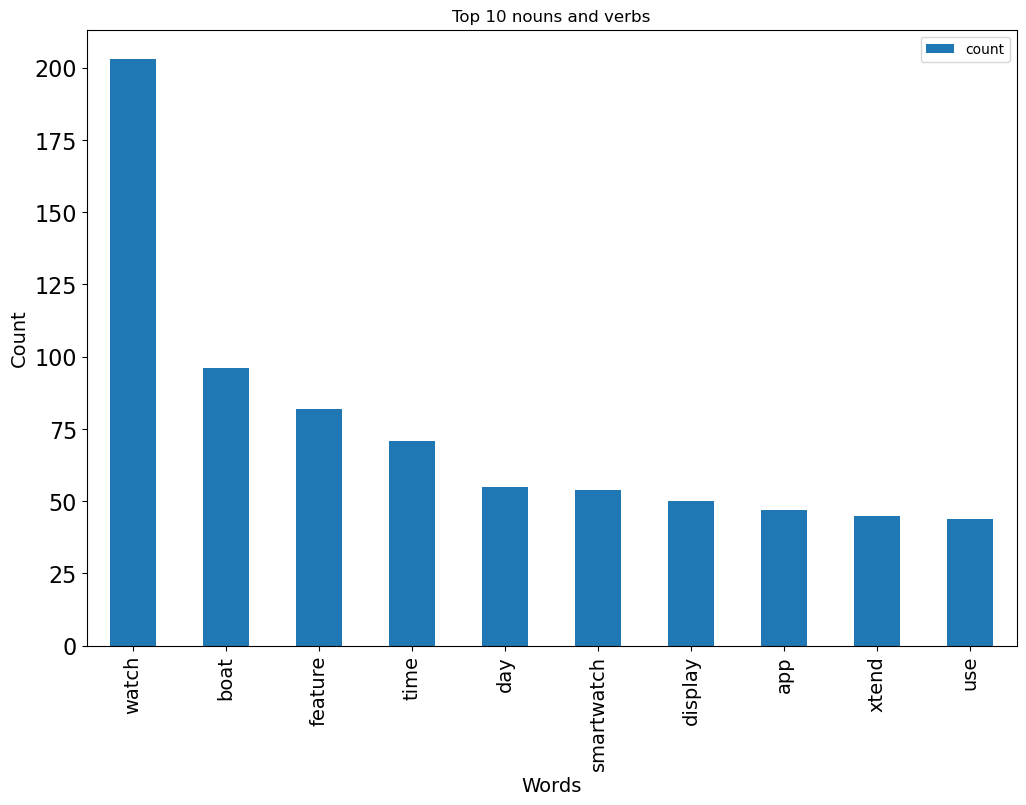

In [83]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [84]:
#BOW Features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])
#TF-IDF Features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [85]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [86]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,count
Clean_Reviews,
pos,103
neg,3


In [87]:
#calculating the subjectivity and polarity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...,"[look, good, easy, use, charging, fast, charge...",0.608333,0.320833
1,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...,"[smart, watch, good, value, money, feature, pa...",0.681905,0.226190
2,smart watch nice good quality boat company,this smart watch nice good quality boat company,"[smart, watch, nice, good, quality, boat, comp...",0.747619,0.504762
3,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo...",0.472013,0.129274
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon...",0.441033,-0.001266


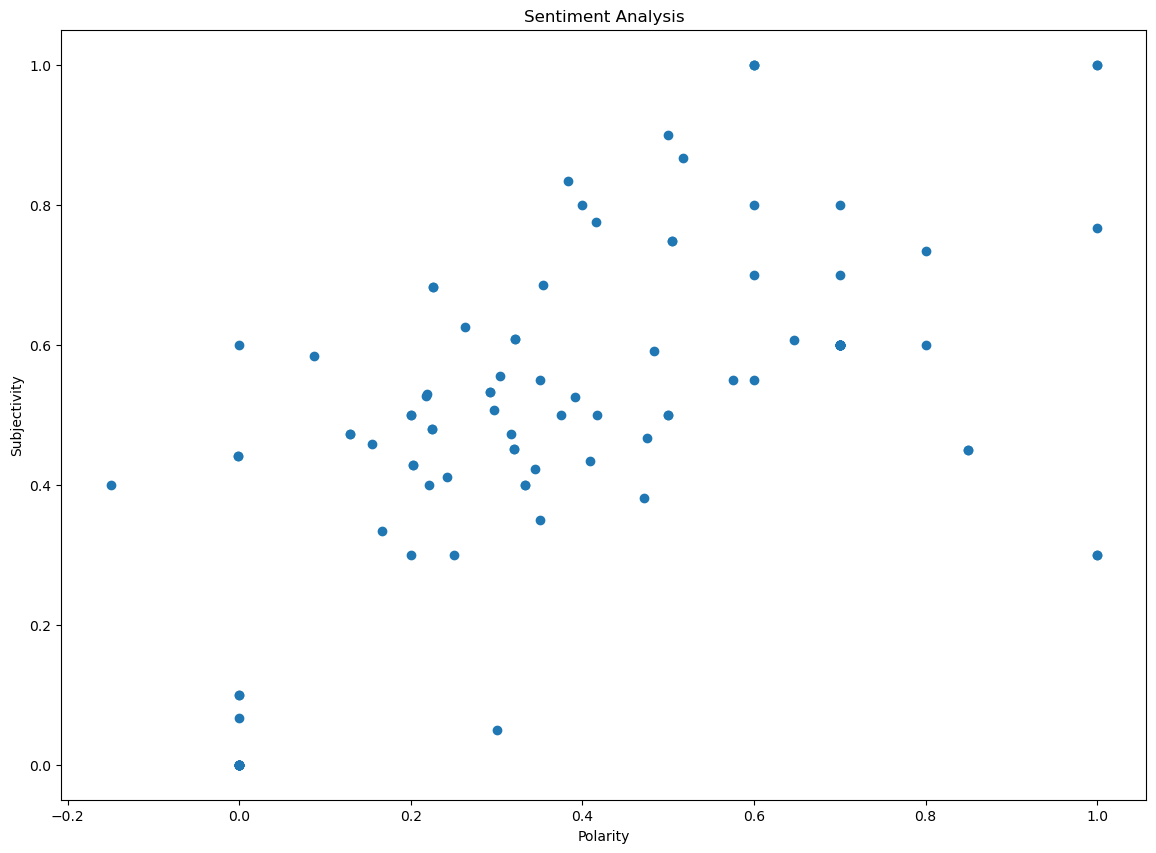

In [88]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [89]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,look good easy use charging fast charge stay l...,looks good... easy use. charging fast. charges...,"[look, good, easy, use, charging, fast, charge...",0.608333,0.320833,pos
1,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...,"[smart, watch, good, value, money, feature, pa...",0.681905,0.226190,pos
2,smart watch nice good quality boat company,this smart watch nice good quality boat company,"[smart, watch, nice, good, quality, boat, comp...",0.747619,0.504762,pos
3,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo...",0.472013,0.129274,pos
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon...",0.441033,-0.001266,neg


## Story Generation and Visualization

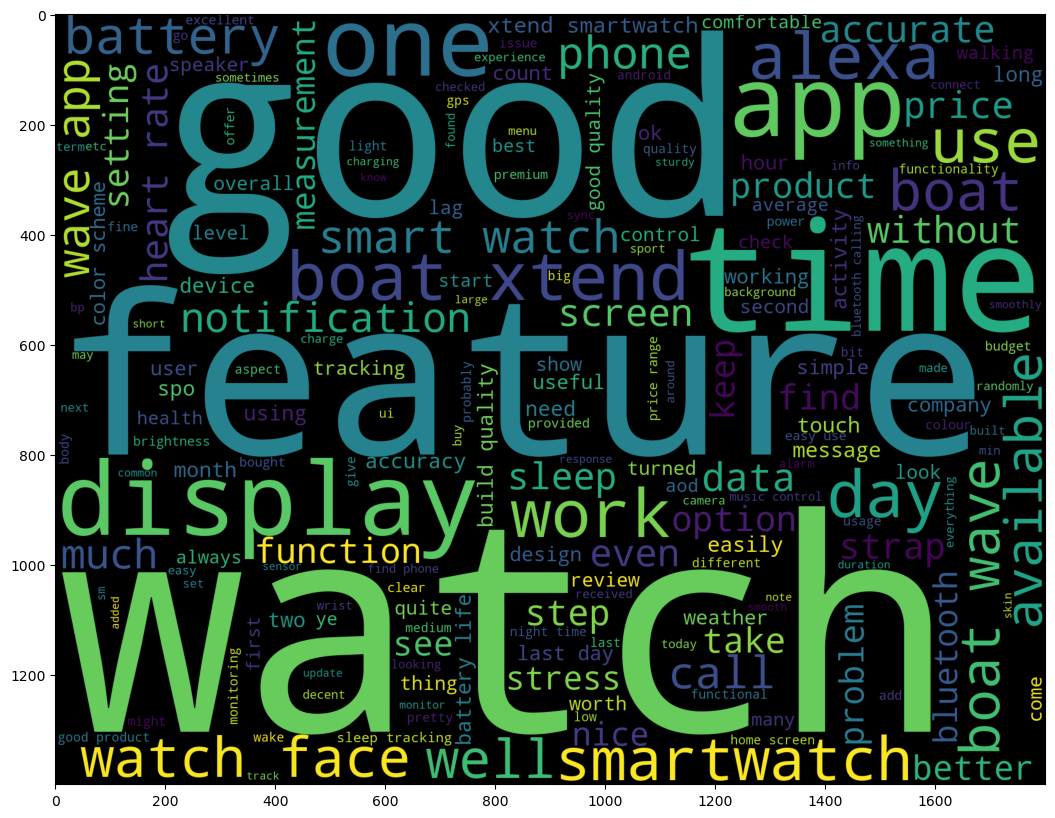

In [90]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

In [91]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

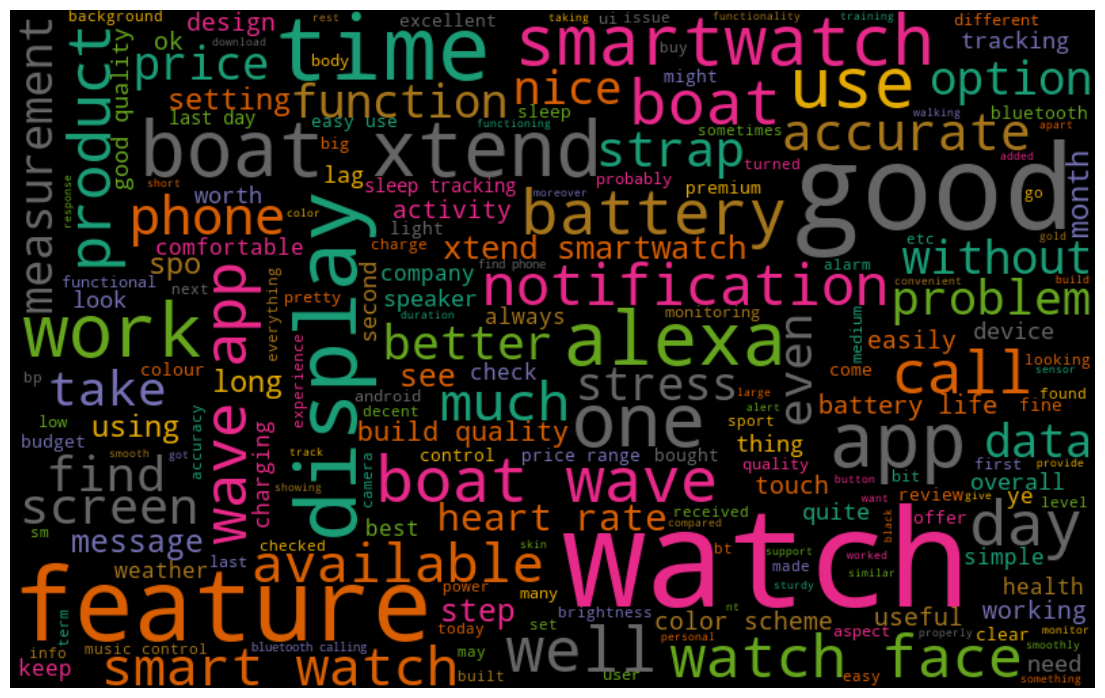

In [92]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

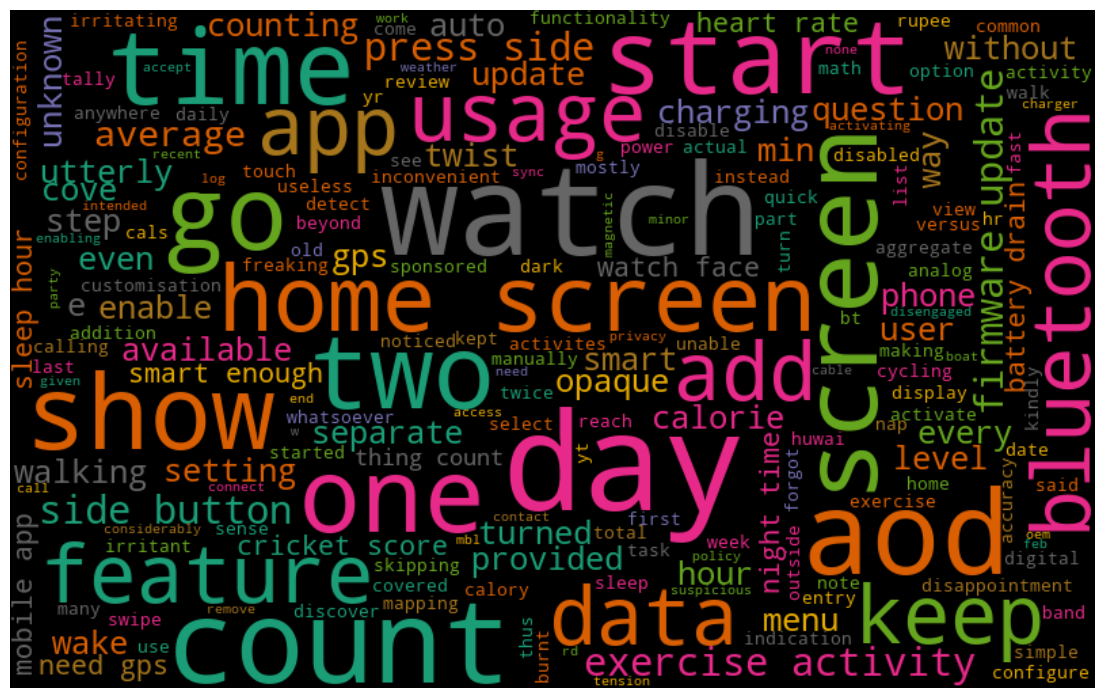

In [93]:
#Most common words in negative Review
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)